In [3]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

In [4]:
image = mx.image.imread('mt_baker.jpg')

In [7]:
type(image)

mxnet.ndarray.ndarray.NDArray

In [8]:
image.shape # HWC layout - height, width, channel. GluonCV expects it as NCHW

(1458, 3000, 3)

In [10]:
image.dtype

numpy.uint8

In [11]:
image.min().asscalar(), image.max().asscalar()

(0, 255)

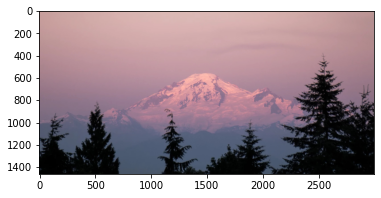

In [13]:
plt.imshow(image.asnumpy())

In [15]:
image = gcv.data.transforms.presets.imagenet.transform_eval(image)

In [20]:
image.shape, image.dtype

((1, 3, 224, 224), numpy.float32)

In [19]:
image.min().asscalar(), image.max().asscalar()

(-2.117904, 2.2489083)

In [22]:
network = gcv.model_zoo.get_model("resnet50_v1d", pretrained=True)

In [23]:
prediction = network(image)

In [24]:
prediction.shape

(1, 1000)

In [26]:
prediction = prediction[0]
prediction[800:]


[-3.2531202e-01 -1.7962772e-01  1.8274807e+00  5.4426223e-02
 -5.3332722e-01  7.4013233e-02  2.7699581e-01  8.3869004e-01
  1.2335181e-02 -5.3683996e-01 -3.7753880e-02 -1.9789022e-01
  5.1978207e-01  2.1171673e-01 -4.3737251e-01  6.9948244e-01
 -3.0062345e-01  3.6162743e-01  4.3966380e-01  4.1693950e-01
 -2.3677492e-01 -2.2016984e-01 -5.0142705e-03  6.2686205e-02
 -3.3979404e-01  4.8436403e-01 -9.4639987e-02  6.0352421e-01
 -2.8816170e-01 -6.4671993e-01 -6.5063405e-01  2.1955664e-01
  2.1509547e+00 -1.7388844e-01  9.2691785e-01  2.0618805e-01
  7.6846540e-01  2.3846693e-01  1.3079274e+00  2.7831420e-01
 -5.7755277e-02  6.0172909e-01 -3.5051125e-01  1.4015076e+00
  1.8843684e-01  3.0770099e-01  2.2074832e-01 -5.0091714e-01
  2.8179541e-01  1.2946825e-01 -1.4755040e-02  2.9951504e-01
  5.7537693e-01  1.1625128e+00  2.9112276e-01 -1.5885173e-01
 -3.4790632e-01 -3.1479388e-01  6.2365842e-01 -3.7474066e-02
 -8.4719890e-01  8.3581018e-01  1.7604970e+00  1.7290418e+00
 -4.1431892e-01 -3.9332

In [27]:
#Convert logits to probability#
probability = mx.nd.softmax(prediction)

In [28]:
rounded_probability = mx.nd.round(probability*100)/100

rounded_probability[800:]


[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.04 0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.84 0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.  ]
<NDArray 20

In [29]:
k = 5
topk_indices = mx.nd.topk(probability, k=k)
topk_indices


[980. 970. 979. 672. 975.]
<NDArray 5 @cpu(0)>

In [31]:
network.classes[980]

'volcano'

In [32]:
for i in range(k):
    class_index = topk_indices[i].astype('int').asscalar()
    class_label = network.classes[class_index]
    class_probability = probability[class_index]
    print("#{0} {1} {2} {3}".format(i, class_label, class_index , class_probability))

#0 volcano 980 
[0.84085757]
<NDArray 1 @cpu(0)>
#1 alp 970 
[0.04477887]
<NDArray 1 @cpu(0)>
#2 valley 979 
[0.00564281]
<NDArray 1 @cpu(0)>
#3 mountain tent 672 
[0.00524272]
<NDArray 1 @cpu(0)>
#4 lakeside 975 
[0.00450998]
<NDArray 1 @cpu(0)>
